In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2

In [2]:
from src import gendata
from src.gendata import sig

In [3]:
np.random.seed(1)
NN = 150
sigma = 0.5
pt_1 = np.random.randn(NN, 2) * sigma + np.array([1., 1.])
pt_2 = np.random.randn(NN, 2) * sigma + np.array([-1., -1.])
pts = np.concatenate((pt_1, pt_2), axis=0)

pt_1_a = pt_1.copy()
pt_1_a[:, 1] = pt_2[:, 1]
pt_2_a = pt_2.copy()
pt_2_a[:, 1] = pt_1[:, 1]
pts_a = np.concatenate((pt_1_a, pt_2_a), axis=0)

pts_b = pts_a.copy()
pts_b[:, 1] = pts_b[np.random.permutation(range(len(pts_b))), 1]

In [4]:
pts.shape, pts_a.shape, pts_b.shape

((300, 2), (300, 2), (300, 2))

In [5]:
np.allclose(np.sort(pts[:, 0]), np.sort(pts_a[:, 0]), np.sort(pts_b[:, 0]))

True

In [6]:
np.allclose(np.sort(pts[:, 1]), np.sort(pts_a[:, 1]), np.sort(pts_b[:, 1]))

True

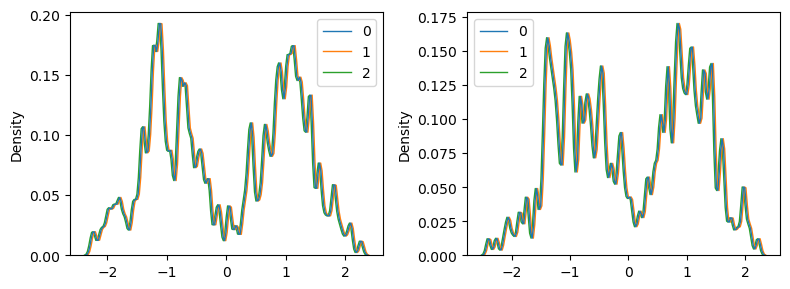

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

for i, ax in enumerate(axes):
    sns.kdeplot([pts[:, i], pts_a[:, i] + 0.02, pts_b[:, i] - 0.02], bw_adjust=0.1, lw=1, ax=ax)
plt.tight_layout()

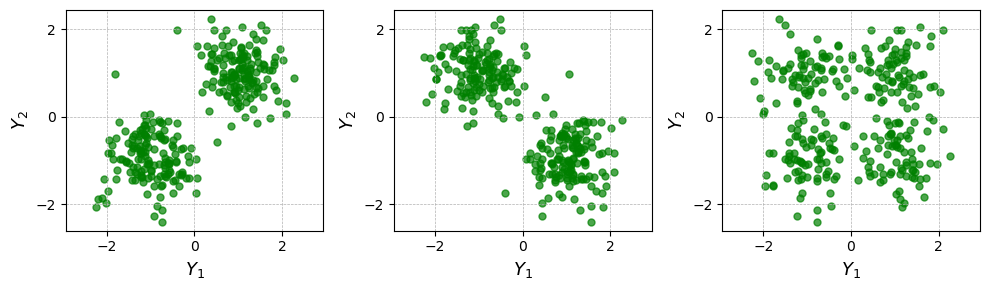

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

for i, ax in enumerate(axes):
    if i == 0:
        ax.scatter(pts[:, 0], pts[:, 1], alpha=0.7, s=25, color='g')
    elif i == 1:
        ax.scatter(pts_a[:, 0], pts_a[:, 1], alpha=0.7, s=25, color='g')
    else:
        ax.scatter(pts_b[:, 0], pts_b[:, 1], alpha=0.7, s=25, color='g')
    
    ax.grid(True, linewidth=0.5, ls='--')
    ax.axis('equal')
    ax.set_xticks([-2, 0, 2])
    ax.set_yticks([-2, 0, 2])
    ax.set_xlabel(r'$Y_1$', fontsize=13)
    ax.set_ylabel(r'$Y_2$', fontsize=13)

plt.tight_layout()
# plt.savefig('fg_toyex.pdf', dpi=400)
plt.show()

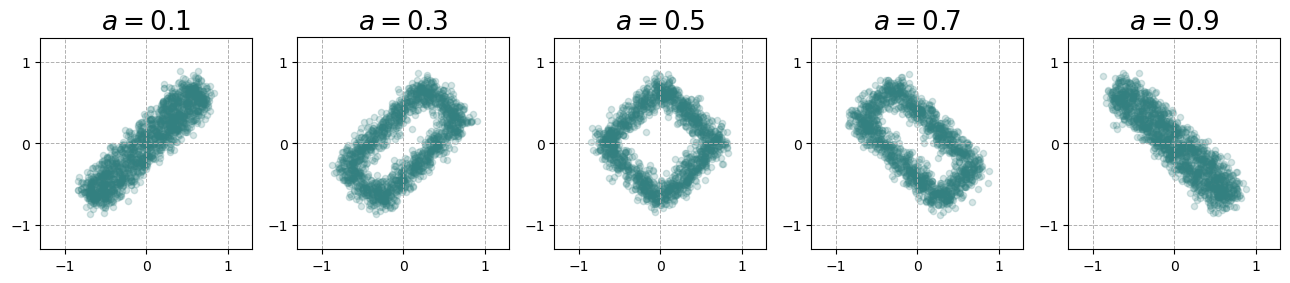

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(13, 4))
ax = axes.ravel()

for i in range(len(ax)):
    
    a = [0.1, 0.3, 0.5, 0.7, 0.9][i]
    dat = gendata.create_r_slice(size=1500, a=a, seed=i+88)
    ax[i].scatter(dat[:, 0], dat[:, 1], s=20, color=(0.2, 0.5, 0.5), alpha=0.2)
    ax[i].grid(True, linewidth=0.7, ls='--')
    ax[i].set_xticks(np.arange(-1, 2, 1))
    ax[i].set_yticks(np.arange(-1, 2, 1))
    ax[i].set_title(r'$a = {}$'.format(a), fontsize=19)
    ax[i].set_aspect('equal', adjustable='box')
    ax[i].set_xlim(-1.3, 1.3)
    ax[i].set_ylim(-1.3, 1.3)

plt.tight_layout()
# plt.savefig('fg_rdata.pdf', dpi=400)
plt.show()

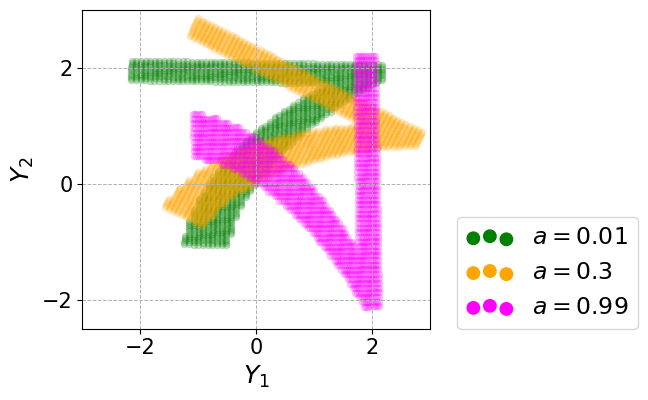

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 4.1))

a_s = [0.01, 0.3, 0.99]

cdat = gendata.create_character_data(char='7')

for i, a in enumerate(a_s):
    dat = gendata.create_c_slice(a=a, char_data=cdat)
    ax.scatter(dat[:, 0], dat[:, 1], s=20, c=['green', 'orange', 'magenta'][i], 
               alpha=0.2, label=fr'$a = {a}$')

leg = ax.legend(fontsize=17, markerscale=2, scatterpoints=3, 
                loc='lower right', bbox_to_anchor=(1.6, 0.0), borderaxespad=0.0)
for lh in leg.legend_handles:
    lh.set_alpha(1)
ax.set_xticks([-2, 0, 2, 4])
ax.set_yticks([-2, 0, 2, 4])
# ax.set_title(r'$a = {}$'.format(a), fontsize=19)
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-3, 3)
ax.set_ylim(-2.5, 3)
ax.set_xlabel(r'$Y_1$', fontsize=18); ax.set_ylabel(r'$Y_2$', fontsize=18)
ax.tick_params(axis='both', labelsize=15)
ax.grid(True, linewidth=0.7, ls='--')

plt.tight_layout()
# plt.savefig('fg_char_rotated.pdf', dpi=400)
plt.show()

In [14]:
%%time
X, Y = gendata.create_c(size=10000, seed=88, dim_used=2, dim_useless=0, char='7')
X.shape, Y.shape

CPU times: total: 1.59 s
Wall time: 1.86 s


((10000, 2), (10000, 2))

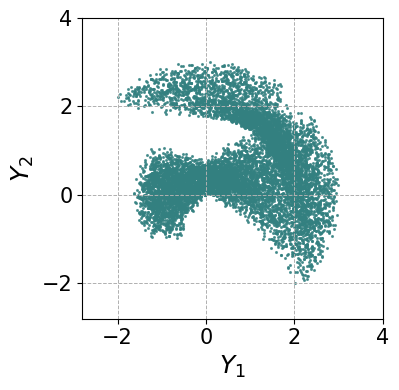

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 4))
plt.scatter(Y[:, 0], Y[:, 1], s=1.5, color=(0.2, 0.5, 0.5), alpha=.75)
ax.set_aspect('equal', adjustable='box')
ax.set_xticks([-2, 0, 2, 4]); ax.set_yticks([-2, 0, 2, 4])
ax.set_xlim(-2.8, 4)
ax.set_ylim(-2.8, 4)
ax.tick_params(axis='both', labelsize=15)
ax.grid(True, linewidth=0.7, ls='--')
ax.set_xlabel(r'$Y_1$', fontsize=18); ax.set_ylabel(r'$Y_2$', fontsize=18)
plt.tight_layout()
# plt.savefig('fg_char_overlap.pdf', dpi=400)
plt.show()

In [ ]:
from src.qmem import QMEM, quantile, energy_distance

In [ ]:
ths = np.linspace(0, 2 * np.pi, 6)[:-1]
data = np.c_[np.cos(ths), np.sin(ths)]

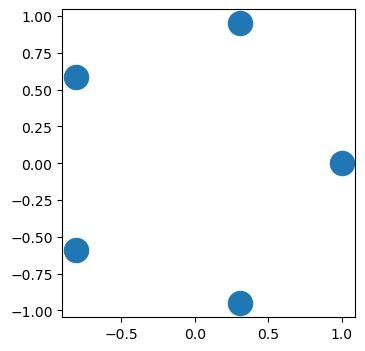

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
plt.scatter(data[:, 0], data[:, 1], s=300)
ax.set_aspect('equal')

In [ ]:
N_DIRECTIONS = 50
N_QS = 12
ths = np.linspace(0, 2 * np.pi, N_DIRECTIONS + 1)[:-1] + 0.1
directions = np.c_[np.cos(ths), np.sin(ths)]
directions = directions / np.linalg.norm(directions, axis=1).reshape(-1, 1)
qs = np.linspace(0.05, 0.95, N_QS)
pj_data = np.array([quantile(data @ v, q=qs) for v in directions]).T

In [ ]:
%%time
out = QMEM(qs=qs, directions=directions, pj_data=pj_data, n_base=100, seed=7, n_ensemble=10, n_jobs=2, patience=4)
w_opt, points, _ = out[-1]

Initial search done.
Optimization done.
Optimization done.
Optimization done.
Optimization done.
Optimization done.
Parallel optimization in progress... Done.
Dropping unnecessary support points... Done.
Number of support points: 595, selection rate: 59.5 %
CPU times: total: 18.5 s
Wall time: 30.1 s


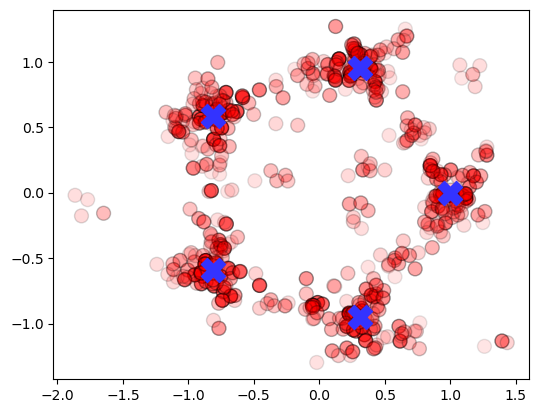

In [ ]:
fig, ax = plt.subplots()
plt.scatter(data[:, 0], data[:, 1], s=300, zorder=2, color=(0.2, 0.2, 1), marker='X')
ax.set_aspect('equal')
plt.scatter(points[:, 0], points[:, 1], alpha=w_opt / np.max(w_opt), c='r', edgecolors='k', s=100)